In [1]:
import torch
from torch import nn, optim
from torchsummary import summary
import torchvision
import numpy as np
import torchvision.transforms as T
import matplotlib.pyplot as plt
import os
from torch.utils.tensorboard import SummaryWriter
from torch.utils import tensorboard
from torchvision.models import resnet18
import zipfile
import glob
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import random

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
torch.cuda.empty_cache()

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))

Device: cuda:0


In [4]:
print(torch.cuda.device_count())

1


In [5]:
augs = T.Compose([
    T.RandomRotation(degrees = 20),
    T.Resize((224,224)),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

test_augs=  T.Compose([
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

In [6]:
img_files = os.listdir('data/train/train')

def train_path(p):
    return f"data/train/train/{p}"

img_files = list(map(train_path, img_files))
random.shuffle(img_files)

train = img_files[:20000]
val = img_files[20000:]

for i in range(100):
    print(train[i])

class CatDogDataset(Dataset):
    def __init__(self, image_paths, transform):
        super().__init__()
        self.paths = image_paths
        self.len = len(self.paths)
        self.transform = transform

    def __len__(self):
        return self.len

    def __getitem__(self, index):
        path = self.paths[index]
        image = Image.open(path).convert('RGB')
        image = self.transform(image)
        label = 0 if 'cat' in path else 1
        return (image, label)

data/train/train/cat.12324.jpg
data/train/train/dog.2893.jpg
data/train/train/cat.2550.jpg
data/train/train/cat.9524.jpg
data/train/train/cat.2062.jpg
data/train/train/cat.3563.jpg
data/train/train/cat.10669.jpg
data/train/train/dog.2661.jpg
data/train/train/dog.3044.jpg
data/train/train/cat.8794.jpg
data/train/train/cat.7352.jpg
data/train/train/cat.8944.jpg
data/train/train/cat.3222.jpg
data/train/train/dog.8972.jpg
data/train/train/dog.6672.jpg
data/train/train/cat.7235.jpg
data/train/train/cat.7459.jpg
data/train/train/dog.4735.jpg
data/train/train/dog.7052.jpg
data/train/train/dog.7725.jpg
data/train/train/dog.4022.jpg
data/train/train/dog.224.jpg
data/train/train/dog.4619.jpg
data/train/train/dog.10635.jpg
data/train/train/dog.11865.jpg
data/train/train/dog.10486.jpg
data/train/train/dog.10891.jpg
data/train/train/dog.10146.jpg
data/train/train/cat.9822.jpg
data/train/train/cat.6897.jpg
data/train/train/cat.5799.jpg
data/train/train/cat.2216.jpg
data/train/train/cat.1668.jpg
data

In [7]:
train_data = CatDogDataset(train, augs)
val_data = CatDogDataset(val, test_augs)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(1)
tensor(0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(1)
tensor(1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(0)


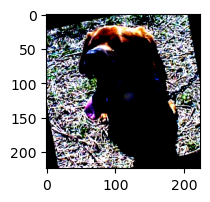

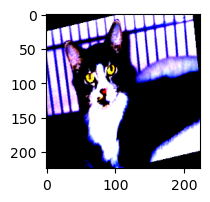

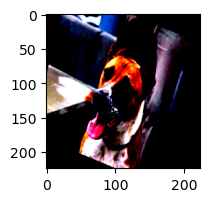

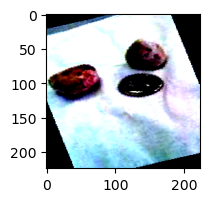

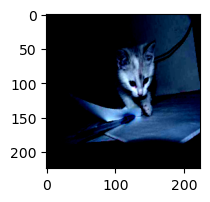

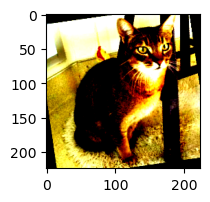

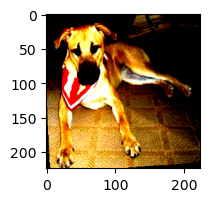

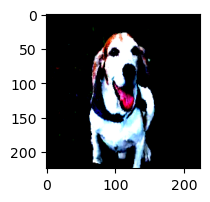

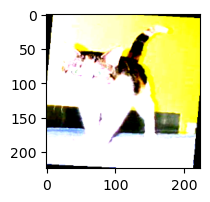

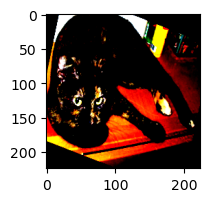

In [8]:
def imshow(img):
    plt.figure(figsize=(2,2))
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

dataiter = iter(train_loader)
images, labels = next(dataiter)

for i in range(10):
    print(labels[i])
    imshow(torchvision.utils.make_grid(images[i]))

In [9]:
def EfficientNet(num_classes=2):
    model = torchvision.models.efficientnet_b0(pretrained = False)
    model.fc = nn.Sequential(
        nn.LazyLinear(num_classes),
        nn.Softmax(-1)
    )
    return model
model = EfficientNet()
model.to(device)
summary(model, (3,224,224))

C:\Users\duyan\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\duyan\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\duyan\anaconda3\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 16, 112, 112]             512
      BatchNorm2d-14         [-1, 16, 1

In [10]:
optimizer = optim.SGD(model.parameters(), momentum = 0.9, lr = 0.01, weight_decay=1e-5)
loss_func = nn.CrossEntropyLoss(reduction = 'mean')
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience = 4,verbose = True, min_lr = 0.00001)
num_epochs = 20

In [ ]:
train_acc_list = []
val_acc_list = []

train_loss_list = []
val_loss_list = []

es_count = 0 # Patience for LR scheduler
curr_epoch = 0
curr_loss = 0
best_test_acc = 0
best_epoch = 0

for epoch in range(num_epochs):
    curr_epoch = epoch
    if es_count == 15:
        print("Stop training")
        break
    model.train()
    train_loss = 0
    train_acc = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        accuracy = (torch.max(outputs, dim=-1, keepdim=True)[1].flatten() == labels).sum() / len(labels)
        train_acc += accuracy.item()

    train_acc /= len(train_loader)
    train_loss /= len(train_loader)
    train_acc_list.append(train_acc)
    train_loss_list.append(train_loss)

    model.eval()

    val_acc = 0
    val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = loss_func(outputs, labels)
            val_loss += loss.item()
            accuracy = (torch.max(outputs, dim=-1, keepdim=True)[1].flatten() == labels).sum() / len(labels)
            val_acc += accuracy.item()

        val_acc /= len(val_loader)
        val_loss /= len(val_loader)
        val_acc_list.append(val_acc)
        val_loss_list.append(val_loss)

        if val_acc > best_test_acc:
            best_epoch = epoch
            best_test_acc = val_acc
            torch.save(model.state_dict(), "best_effnet.pth")

    scheduler.step(val_loss)

    if abs(val_loss - curr_loss) < 0.005 or val_loss > curr_loss:
        es_count += 1
        curr_loss = val_loss
    else:
        es_count = 0
        curr_loss = val_loss

    print(f"Epoch {epoch + 1}/{num_epochs} - Training Acc: {train_acc:.4f} - Validation Acc: {val_acc:.4f}")


Epoch 1/20 - Training Acc: 0.5376 - Validation Acc: 0.6113
Epoch 2/20 - Training Acc: 0.6296 - Validation Acc: 0.6827
Epoch 3/20 - Training Acc: 0.7054 - Validation Acc: 0.7554
Epoch 4/20 - Training Acc: 0.7504 - Validation Acc: 0.7763
Epoch 5/20 - Training Acc: 0.7851 - Validation Acc: 0.8063
Epoch 6/20 - Training Acc: 0.8298 - Validation Acc: 0.8585
Epoch 7/20 - Training Acc: 0.8644 - Validation Acc: 0.8999
Epoch 8/20 - Training Acc: 0.8847 - Validation Acc: 0.9094


In [ ]:

train_loss_list = np.array(train_loss_list)
val_loss_list = np.array(val_loss_list)
train_acc_list = np.array(train_acc_list)
val_acc_list = np.array(val_acc_list)

writer = SummaryWriter()

writer.flush()
for i in range(curr_epoch):
    writer.add_scalars('Loss', {'Train': train_loss_list[i], 'Test': val_loss_list[i]}, i)
    writer.add_scalars('Accuracy', {'Train': train_acc_list[i], 'Test': val_acc_list[i]}, i)

writer.close()
